# Benchmark on k

In this file we quickly analyze the performance of our program with different hyperparameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
attempts = 5
# kappas = [5, 10, 20, 40, 50, 80]
kappas = [5, 10, 20, 25, 30, 40, 50, 80]
G = 3
len_df = 494_021
num_part = 12

rbow= ['#FE4A49', '#FED766', '#009FB7','#007FBI', 'blue', 'indigo', 'violet']

# k vs. time
After downloading the data, we take the average time taken for the single parts of the algorithm to run: in the end we show how the total time scales with respect to the increase of the number of required centers

In [2]:
# Define quantities for plots
time_upload = []
time_parallel = []
time_wx = []
time_pp = []
time_kmeans = []
tot_time = []

In [3]:
# Load data
for k in kappas:
    upload, parallel, wx, pp, kmeans, tots = [], [], [], [], [], []
    for attempt in range(attempts):

        # Load the file
        file_name = "benchmark_k/k" + str(int(k)) + "_G" + str(int(G)) + "_lendf" + str(int(len_df)) + "_npart" + str(int(num_part)) + "_n" + str(int(attempt))
        with open(file_name) as f:
            lines = [line.rstrip() for line in f]

        # Convert string to float
        for l in range(9):
            lines[l] = float(lines[l])

        # Convert string list to float list
        for l in range(10, 12):
            lista = lines[l][1:-1]
            lista = [float(x.strip()) for x in lista.split(',')]
            lines[l] = lista

        upload.append(lines[4])
        parallel.append(lines[5])
        wx.append(lines[6])
        pp.append(lines[7])
        kmeans.append(lines[8])
        tots.append(sum(lines[4:9]))

    time_upload.append([k, np.mean(upload), np.std(upload)])
    time_parallel.append([k, np.mean(parallel), np.std(parallel)])
    time_wx.append([k, np.mean(wx), np.std(wx)])
    time_pp.append([k, np.mean(pp), np.std(pp)])
    time_kmeans.append([k, np.mean(kmeans), np.std(kmeans)])
    tot_time.append([k, np.mean(tots), np.std(tots)])


In [4]:
time_parallel

[[5, 65.83929977416992, 3.7532293152814646],
 [10, 81.93780884742736, 5.160522073254584],
 [20, 111.77379322052002, 2.260337860610938],
 [25, 125.68540768623352, 10.227567670891581],
 [30, 128.72302913665771, 7.428406155347166],
 [40, 156.75697355270387, 4.288012536791521],
 [50, 171.41983551979064, 9.056065929156189],
 [80, 217.75469012260436, 6.622272151453355]]

plt.errorbar(np.array(time_upload)[:,0], np.array(time_upload)[:,1], yerr = np.array(time_upload)[:,2], color='gold')



plt.errorbar(np.array(time_upload)[:,0], np.array(time_upload)[:,1], yerr=np.array(time_upload)[:,2], fmt='o', color='black', 
             ecolor='lightgray', elinewidth=3, capsize=0)


In [5]:
type(tot_time)

list

In [6]:
def plot_times(ax,sometime, linecol='#FF0000', pointcol='black', errcol='#FFC100', title='',dologx=False,dology=False):
    #fig = plt.figure()
    ax.plot(np.array(sometime)[:,0], np.array(sometime)[:,1], color=linecol)

    ax.errorbar(np.array(sometime)[:,0], np.array(sometime)[:,1], yerr=np.array(sometime)[:,2], fmt='o', color=pointcol, 
                 ecolor=errcol, elinewidth=3, capsize=0)
    
    ax.grid()
    #ax.set_xlabel(xlabel)
    ax.set_ylabel('time [s]')
    ax.set_title(title)
    if dologx:
        ax.set_xscale('log')
    if dology:
        ax.set_yscale('log')

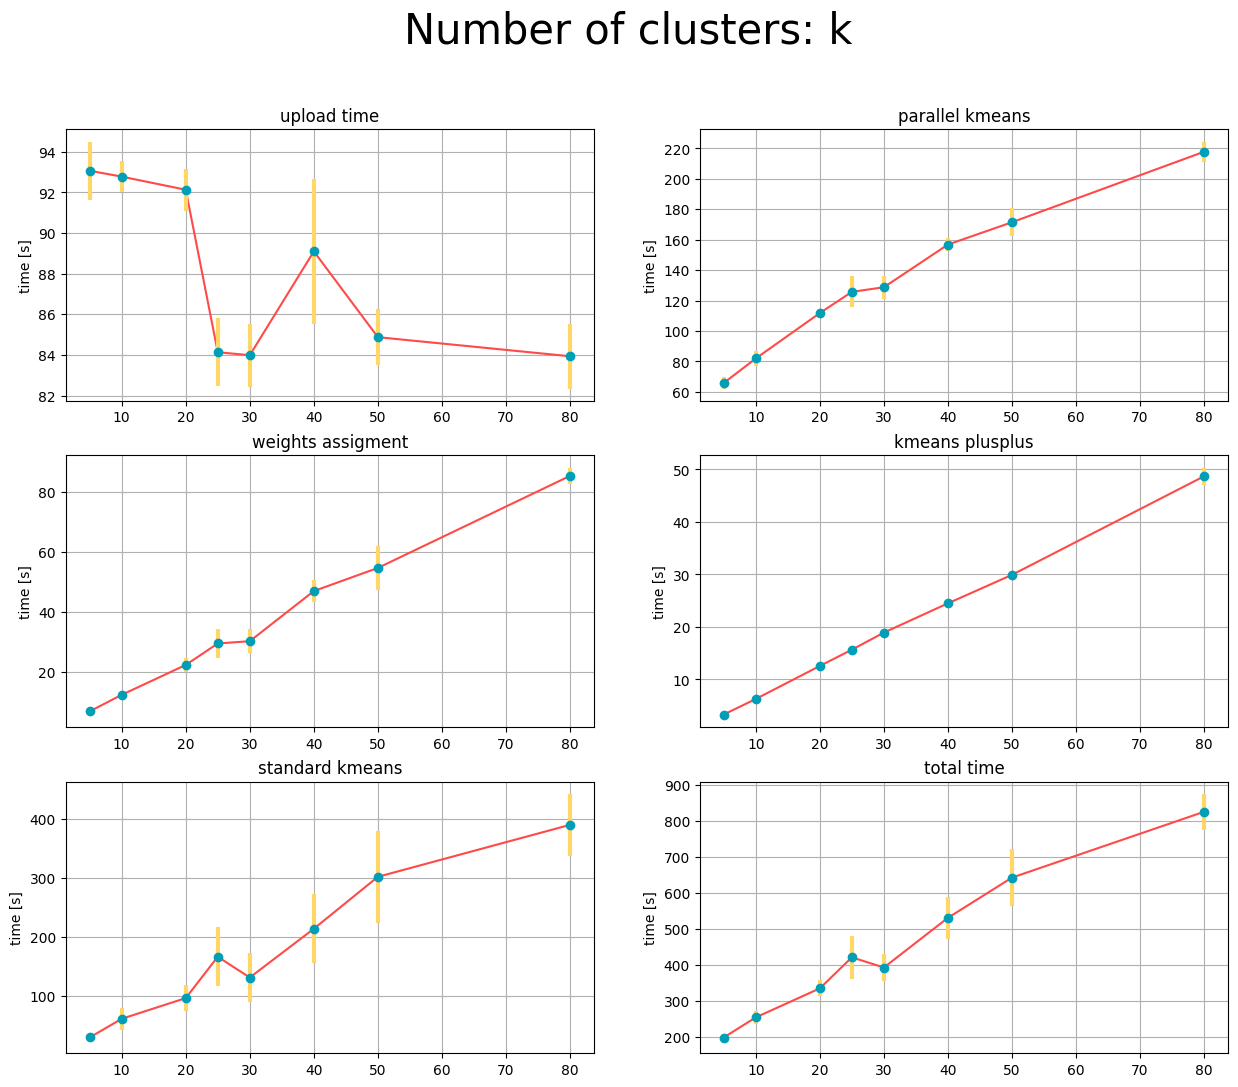

In [7]:
fig = plt.figure(figsize=(15,12))
fig.suptitle('Number of clusters: k',fontsize=30)

ax = fig.subplots(ncols=2,nrows=3)
plot_times(ax[0,0],time_upload,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='upload time')
plot_times(ax[0,1],time_parallel,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='parallel kmeans')
plot_times(ax[1,0],time_wx,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2], title='weights assigment')
plot_times(ax[1,1],time_pp,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='kmeans plusplus')
plot_times(ax[2,0],time_kmeans,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='standard kmeans')
plot_times(ax[2,1],tot_time,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='total time')
plt.subplots_adjust()

In [8]:
#plt.rainbow(5)

# Number of records vs time

In [9]:
# Hyperparameters
attempts = 5
# kappas = [5, 10, 20, 40, 50, 80]
k = 20
G = 3
len_dfs = [1000, 5000, 10000, 50000, 100000, 494021]
num_part = 12

### Dataset length analysis
We repeat the previous analysis with respect to the dateset length.

In [10]:
time_upload = []
time_parallel = []
time_wx = []
time_pp = []
time_kmeans = []
tot_time = []

In [11]:
# Load data
for len_df in len_dfs:
    upload, parallel, wx, pp, kmeans, tots = [], [], [], [], [], []
    for attempt in range(attempts):

        # Load the file
        file_name = "benchmark_" + "len_df" + "/k" + str(int(k)) + "_G" + str(int(G)) + "_lendf" + str(int(len_df)) + "_npart" + str(int(num_part)) + "_n" + str(int(attempt))
        with open(file_name) as f:
            lines = [line.rstrip() for line in f]

        # Convert string to float
        for l in range(9):
            lines[l] = float(lines[l])

        # Convert string list to float list
        for l in range(10, 12):
            lista = lines[l][1:-1]
            lista = [float(x.strip()) for x in lista.split(',')]
            lines[l] = lista

        upload.append(lines[4])
        parallel.append(lines[5])
        wx.append(lines[6])
        pp.append(lines[7])
        kmeans.append(lines[8])
        tots.append(sum(lines[4:9]))

    time_upload.append([len_df, np.mean(upload), np.std(upload)])
    time_parallel.append([len_df, np.mean(parallel), np.std(parallel)])
    time_wx.append([len_df, np.mean(wx), np.std(wx)])
    time_pp.append([len_df, np.mean(pp), np.std(pp)])
    time_kmeans.append([len_df, np.mean(kmeans), np.std(kmeans)])
    tot_time.append([len_df, np.mean(tots), np.std(tots)])

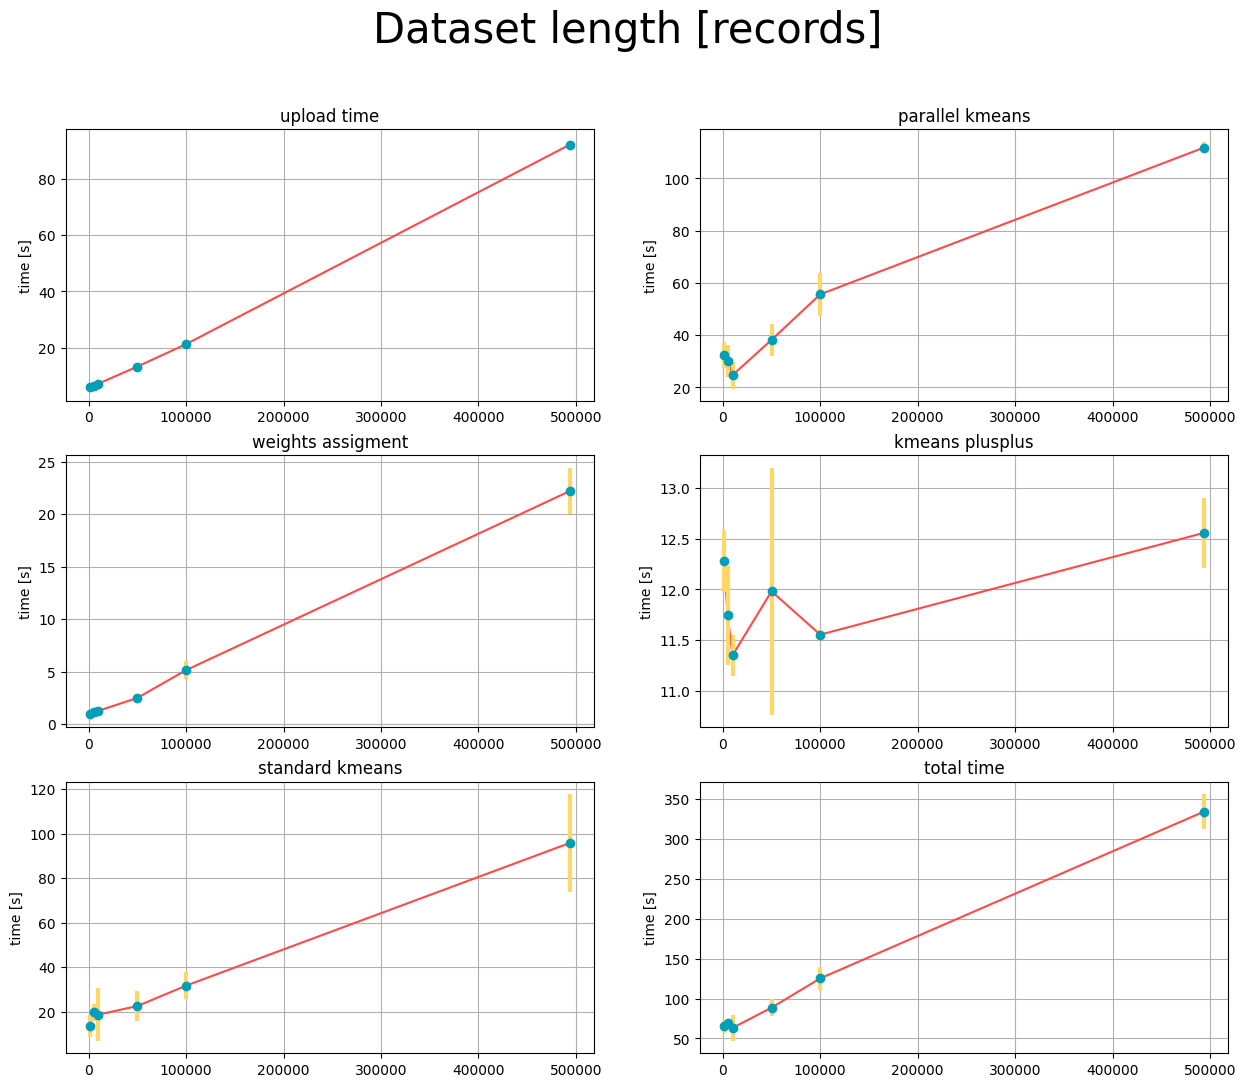

In [12]:
fig = plt.figure(figsize=(15,12))
fig.suptitle('Dataset length [records]',fontsize=30)

ax = fig.subplots(ncols=2,nrows=3)
plot_times(ax[0,0],time_upload,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='upload time',dologx=False)
plot_times(ax[0,1],time_parallel,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='parallel kmeans',dologx=False)
plot_times(ax[1,0],time_wx,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2], title='weights assigment',dologx=False)
plot_times(ax[1,1],time_pp,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='kmeans plusplus',dologx=False)
plot_times(ax[2,0],time_kmeans,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='standard kmeans',dologx=False)
plot_times(ax[2,1],tot_time,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='total time',dologx=False,dology=False)
plt.subplots_adjust()

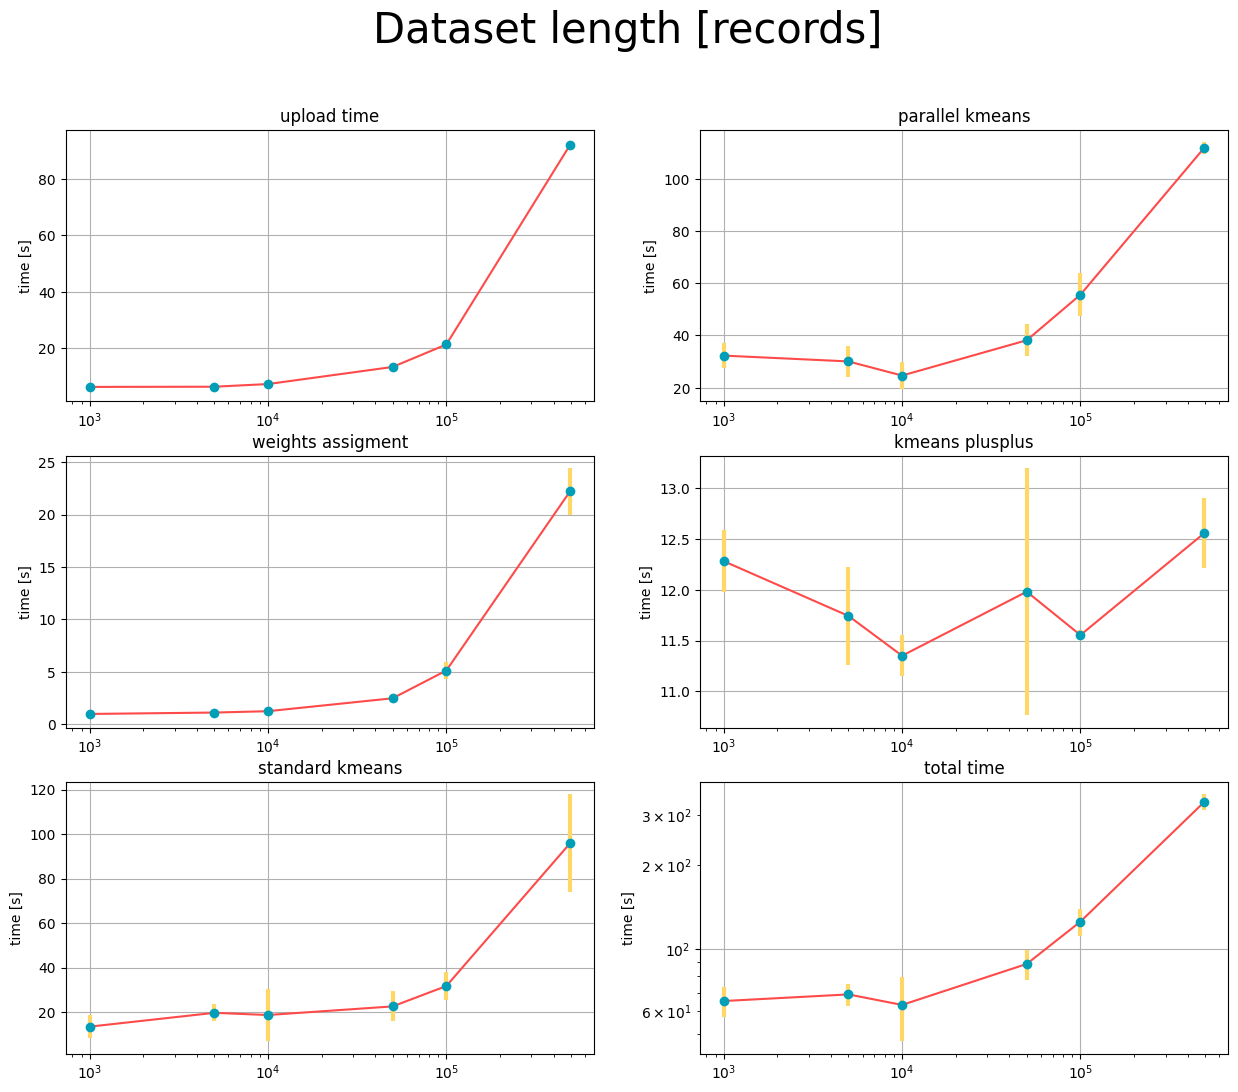

In [13]:
fig = plt.figure(figsize=(15,12))
fig.suptitle('Dataset length [records]',fontsize=30)

ax = fig.subplots(ncols=2,nrows=3)
plot_times(ax[0,0],time_upload,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='upload time',dologx=True)
plot_times(ax[0,1],time_parallel,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='parallel kmeans',dologx=True)
plot_times(ax[1,0],time_wx,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2], title='weights assigment',dologx=True)
plot_times(ax[1,1],time_pp,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='kmeans plusplus',dologx=True)
plot_times(ax[2,0],time_kmeans,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='standard kmeans',dologx=True)
plot_times(ax[2,1],tot_time,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='total time',dologx=True,dology=True)
plt.subplots_adjust()

# Number of partitions vs time

We know vary the number of partitions of `clean_X`and check the time performance. We keep k=20 and G=3, on 10% of the dataset.

In [14]:
# Hyperparameters
#Averaged over 5 runs

attempts = 3
k = 20
G = 3
len_dfs = 494021
num_parts = [6, 12, 24, 36, 64, 72, 96, 128]

In [15]:
time_upload = []
time_parallel = []
time_wx = []
time_pp = []
time_kmeans = []
tot_time = []

In [16]:
# Load data
for num_part in num_parts:
    upload, parallel, wx, pp, kmeans, tots = [], [], [], [], [], []
    for attempt in range(attempts):

        # Load the file
        file_name = "benchmark_" + "part" + "/k" + str(int(k)) + "_G" + str(int(G)) + "_lendf" + str(int(len_df)) + "_npart" + str(int(num_part)) + "_n" + str(int(attempt))
        with open(file_name) as f:
            lines = [line.rstrip() for line in f]

        # Convert string to float
        for l in range(9):
            lines[l] = float(lines[l])

        # Convert string list to float list
        for l in range(10, 12):
            lista = lines[l][1:-1]
            lista = [float(x.strip()) for x in lista.split(',')]
            lines[l] = lista

        upload.append(lines[4])
        parallel.append(lines[5])
        wx.append(lines[6])
        pp.append(lines[7])
        kmeans.append(lines[8])
        tots.append(sum(lines[4:9]))

    time_upload.append([num_part, np.mean(upload), np.std(upload)])
    time_parallel.append([num_part, np.mean(parallel), np.std(parallel)])
    time_wx.append([num_part, np.mean(wx), np.std(wx)])
    time_pp.append([num_part, np.mean(pp), np.std(pp)])
    time_kmeans.append([num_part, np.mean(kmeans), np.std(kmeans)])
    tot_time.append([num_part, np.mean(tots), np.std(tots)])

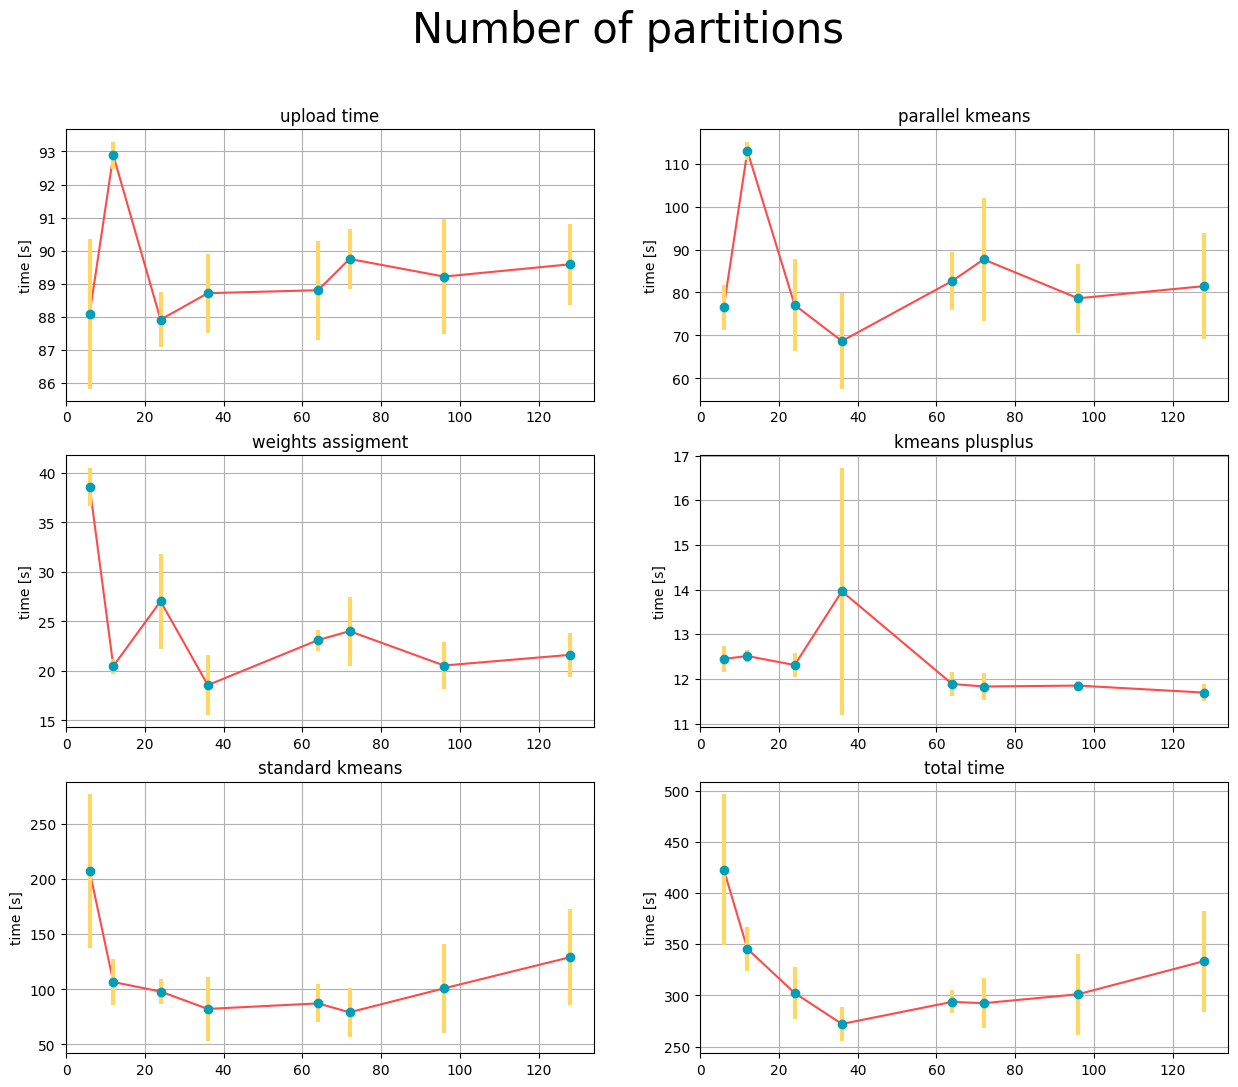

In [17]:
fig = plt.figure(figsize=(15,12))
fig.suptitle('Number of partitions',fontsize=30)

ax = fig.subplots(ncols=2,nrows=3)
plot_times(ax[0,0],time_upload,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='upload time')
plot_times(ax[0,1],time_parallel,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='parallel kmeans')
plot_times(ax[1,0],time_wx,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2], title='weights assigment')
plot_times(ax[1,1],time_pp,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='kmeans plusplus')
plot_times(ax[2,0],time_kmeans,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='standard kmeans')
plot_times(ax[2,1],tot_time,linecol=rbow[0],errcol=rbow[1],pointcol=rbow[2],title='total time')
plt.subplots_adjust()